<a href="https://colab.research.google.com/github/aashu-0/learn-pytorch/blob/main/03_pytorch_cv_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model 2-  Convolutional Neural Networks**

- we are improve our previous model and this time using a CNN model
- CNN model ==> TinyVGG from cnn explainer

**Model Architecture**
* `input -> [cnn layer -> activation -> pooling] -> output`
* `[..]` can be repeated multiple times

layers to be used:
- `nn.Con2d()` , `nn.MaxPool2d()`

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# setting device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
# copying some functions and code from  https://github.com/aashu-0/learn-pytorch/blob/main/03_pytorch_cv.ipynb

# setup training data

train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),     # convert PIL(python image library) format image into Torch tensors
    target_transform= None      # can transform lables as well
    )

# setup testing data
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download= True,
    transform = ToTensor()
)

class_names =train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,  # size of the filter that's going over the image
                  stride=1, # step size by which filter/kernel move across the image
                  padding=1), #can take values 'valid'(==no padding)
                             #or 'same'(same as input size)  or 'int'(for specific number)

        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride = 1,  # = 1 by default
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)  # by default equal to kernel_size
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units,hidden_units,3,padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units,hidden_units,3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,  #why?? -> get to know little later
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block1(x)
    #print(x.shape)
    x = self.block2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)

    return x


# let's call the our model
torch.manual_seed(42)
model02 = FashionMNISTModelV2( input_shape=1,
                              hidden_units=10,
                               output_shape= len(class_names)).to(device)
model02

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

*So what we have done is just find a model architecture and replicate with code*

**`nn.conv2d()`**

In [5]:
# let's create a toy data just like used on CNN Explainer with same size

torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))  #[batch_size, color_channels, height, width]

test_image = images[0]

print(f'image batch shape: {images.shape}')
print(f'single image shape: {test_image.shape}')

print(f'single image pixel values: {test_image}')

image batch shape: torch.Size([32, 3, 64, 64])
single image shape: torch.Size([3, 64, 64])
single image pixel values: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

In [6]:
# let's create a cnn layer with same dim as TinyVGG
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, # no of channels in input image
                       out_channels=10, # no of channels after convolution
                       kernel_size=3, # filter size
                       stride=1, # step filter take at a time, default 1
                       padding=0) # added to all four sides of input

# pass the data
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [7]:
torch.manual_seed(42)

# create a new conv layer
conv_layer_2 = nn.Conv2d(in_channels=3,
                         out_channels=10,
                         kernel_size=(5,5),  #kernel is usually a square so a tuple also works
                         stride = 2,
                         padding=0)

conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

 - now what's happening behind the scenes of these shape change as parameters passed are changed
 - the goal is to compress the information

In [8]:
# conv2d internal paramas
conv_layer_2.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
                        [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
                        [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
                        [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
                        [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],
              
                       [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
                        [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
                        [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
                        [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
                        [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],
              
                       [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
                        [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
                        [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
                     

as we change the inputs passed to the `nn.conv2d()` these weights and biases shapes are manipulated

In [9]:
conv_layer_2.weight.shape, conv_layer_2.bias.shape


(torch.Size([10, 3, 5, 5]), torch.Size([10]))

In [10]:
conv_layer.weight.shape, conv_layer.bias.shape

(torch.Size([10, 3, 3, 3]), torch.Size([10]))

- these parameters of `nn.conv2d()` are to be set by ourselves => called as 'hyperparameters'
- so how to choose
  1. start random and try different values and findo out i.e fafo
  2. copy a working example like we did :P

**`nn.MaxPool2d()`**

In [11]:
# what happens we pass data through max pooling layer

print(f'Test image original shape: {test_image.shape}')

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just conv layer
test_image_through_conv = conv_layer(test_image)
print(f'shape after passing through conv layer: {test_image_through_conv.shape}')

# pass the data through max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f'shape after going through conv and max pool layer: {test_image_through_conv_and_maxpool.shape}')

Test image original shape: torch.Size([3, 64, 64])
shape after passing through conv layer: torch.Size([10, 62, 62])
shape after going through conv and max pool layer: torch.Size([10, 31, 31])


`kernel_size` of the `nn.MaxPool2d()` layer affect the size of the output shape
halfs in our case (62/2=31)

In [12]:
# let's work with smaller tensor
torch.manual_seed(42)
random_tensor = torch.randn(size=(1,6,6))
print(f'Random Tensor: \n{random_tensor}, \nRandom tensor shape: \n{random_tensor.shape}')

# max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # by default stride = kernel_size

# pass the random tensor
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax pool tensor: \n{max_pool_tensor},\nMax pool tensor shape: \n{max_pool_tensor.shape}')


Random Tensor: 
tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345],
         [-0.0431, -1.6047, -0.7521,  1.6487, -0.3925, -1.4036],
         [-0.7279, -0.5594, -0.7688,  0.7624,  1.6423, -0.1596],
         [-0.4974,  0.4396,  0.3189, -0.4245,  0.3057, -0.7746],
         [ 0.0349,  0.3211,  1.5736, -0.8455, -1.2742,  2.1228],
         [-1.2347, -0.4879, -1.4181,  0.8963,  0.0499,  2.2667]]]), 
Random tensor shape: 
torch.Size([1, 6, 6])

Max pool tensor: 
tensor([[[1.9269, 1.6487, 0.6784],
         [0.4396, 0.7624, 1.6423],
         [0.3211, 1.5736, 2.2667]]]),
Max pool tensor shape: 
torch.Size([1, 3, 3])


different `kernel_size` in `MaxPool2d()` will give different results
Max pool tensor is the maximum value from `random_tensor`

--------------------------------------------------------------------------------

- Let's copy some of the requirements and functions form our initial colab notebook of this module

In [13]:
# now it's training time
# let's create a dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader( train_data,
                               batch_size = BATCH_SIZE,
                               shuffle = True
)

test_dataloader = DataLoader( test_data,
                               batch_size = BATCH_SIZE,
                               shuffle = True
)

Loss Function and Optimizer for our CNN Model

In [14]:
# setup loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model02.parameters(), lr= 0.1)

# accuracy function
!pip install torchmetrics
import torch
import torchmetrics
accuracy_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names))
accuracy_fn = accuracy_fn.to(device)

In [15]:
# training and test functions

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device= device):
  train_loss=0
  train_acc = 0

  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    # to gpu(if avaliable)
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_pred, y)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  # avg loss per epoch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f'Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}')


def test_step (model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()   # put model in eval mode

  # turn on the inference mode
  with torch.inference_mode():
    for X, y in data_loader:

      # send data to gpu
      X, y = X.to(device), y.to(device)

      # forward pass
      test_pred = model(X)

      # loss and acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred, y)

    # avg loss per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f'Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}')

In [16]:
model02

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end-start
  print(f'Train Time on {device}: {total_time:.3f} seconds')

Model Training and Testing

- `tqdm(iterable)` make loops show a smart progress meter

-  tqdm means 'I love you so much' in Spanish (te quiero demasiado)

In [18]:
from tqdm import tqdm
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_start_model02 = timer()

# train and test

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n---')

  train_step(model=model02,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model02,
            data_loader= test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)


train_time_end_model02 = timer()

total_train_time_model02 = print_train_time(start = train_time_start_model02,
                                            end = train_time_end_model02,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Train loss: 0.59128 | Train accuracy: 0.79


 33%|███▎      | 1/3 [00:18<00:36, 18.08s/it]

Test Loss: 0.39385 | Test accuracy: 0.86
Epoch: 1
---
Train loss: 0.35292 | Train accuracy: 0.87


 67%|██████▋   | 2/3 [00:47<00:24, 24.84s/it]

Test Loss: 0.36813 | Test accuracy: 0.87
Epoch: 2
---
Train loss: 0.31900 | Train accuracy: 0.89


100%|██████████| 3/3 [01:05<00:00, 21.68s/it]

Test Loss: 0.32653 | Test accuracy: 0.88
Train Time on cuda: 65.053 seconds


Let's evaluate our model02

In [19]:
torch.manual_seed(42)

# create a function that takes in a trained model, a Dataloader, a loss fn, an acc fn
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
               device: torch.device = device):
  loss = 0
  acc =0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # send data to the target device
      X, y = X.to(device), y.to(device)
      # make preds
      y_pred = model(X)

      # accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_pred, y)


    # average loss/acc per batch

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name' : model.__class__.__name__,    # only works when model was created with a class
          'model_loss' : loss.item(),
          'model_acc': acc.item()}

In [20]:
model02_results = eval_model(model=model02,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model02_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32607659697532654,
 'model_acc': 0.88069087266922}

yay!! pretty nice!!

- comapring model02 with our previous models, it looks like our CNN model performed the best => lowest loss(0.33), highest acc(87%)

But we can see the time taken for training model02 is highest
- this is what we call **Performance-speed tradeoff**
- here the performance increases at the cost of training time

Let's further evaluate model02(our best model)

In [44]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device) # add an extra dimension

      #forward pass
      pred_logits = model(sample)

      #get preds prob(logits -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs) # to turn list of tensor into tensor


In [54]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):  # returns a list of k elements from sequence.
    test_samples.append(sample)
    test_labels.append(label)

# print first test sample shape and label
print(f'Test sample shape: {test_samples[0].shape}')
print(f'Test sample label: {test_labels[0]} ({class_names[test_labels[0]]})')

Test sample shape: torch.Size([1, 28, 28])
Test sample label: 9 (Ankle boot)


In [55]:
# make predictions

pred_probs = make_predictions(model= model02,
                              data=test_samples)

pred_probs[:2]

tensor([[1.8397e-05, 3.1071e-07, 1.7769e-06, 2.3220e-05, 4.2096e-07, 8.6165e-03,
         5.2772e-07, 3.0148e-02, 1.8636e-03, 9.5933e-01],
        [5.6420e-06, 2.9899e-07, 1.8992e-06, 1.1817e-06, 6.0754e-08, 2.4337e-04,
         2.3356e-07, 9.7022e-01, 1.5612e-04, 2.9367e-02]])

In [56]:
# turn pred probabilities into pred labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 7, 2, 0, 1, 0, 3, 5, 4])

In [57]:
test_labels, pred_classes

([9, 7, 2, 0, 1, 0, 4, 5, 4], tensor([9, 7, 2, 0, 1, 0, 3, 5, 4]))

the predicted output of 4th element is not accurate
let's see what's went wrong and visualize!

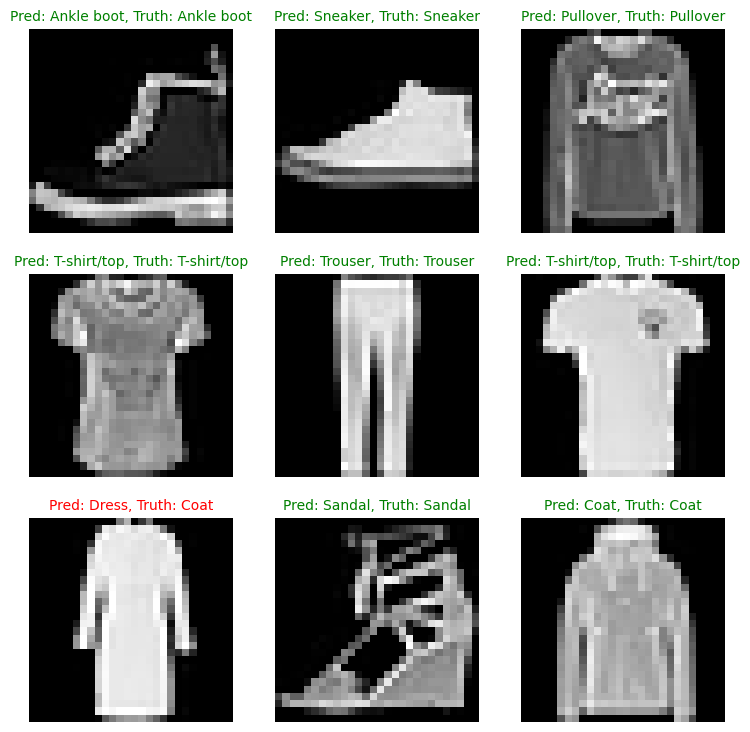

In [58]:
# plot predictons

plt.figure(figsize=(9,9))
nrows= 3
ncols=3
for i, sample in enumerate(test_samples):
  # subplot
  plt.subplot(nrows, ncols, i+1)

  #plot the image
  plt.imshow(sample.squeeze(), cmap='grey')

  #prediction label
  pred_label = class_names[pred_classes[i]]

  # truth label
  truth_label = class_names[test_labels[i]]

  # title tet
  title_text = f'Pred: {pred_label}, Truth: {truth_label}'

  # change title colour as per equality
  if pred_label == truth_label:
    plt.title(title_text, fontsize= 10, c ='g')
  else:
    plt.title(title_text, fontsize= 10, c ='r')

  plt.axis(False);

yay! pretty well but not 100% accurate

In [102]:

from tqdm.auto import tqdm
# make prediction with our trained model
y_preds =[]
model02.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc='Making Predictions'):
    X, y = X.to(device), y.to(device)
    #forward pass
    y_logit = model02(X)

    # logits -> pred probabilities -> predicitons labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    #put preds on cpu for evaluation
    y_preds.append(y_pred.cpu())

#concatenate
y_pred_tensor = torch.cat(y_preds)  # list of tensor -> tensor | can use torch.stack()


Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

- let's plot confusion **matrix**

In [103]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confmat_tensor = confusion_matrix(y_pred_tensor, test_data.targets)

- plot confusion matrix using sklearn and matplotlib

In [104]:
from sklearn import metrics

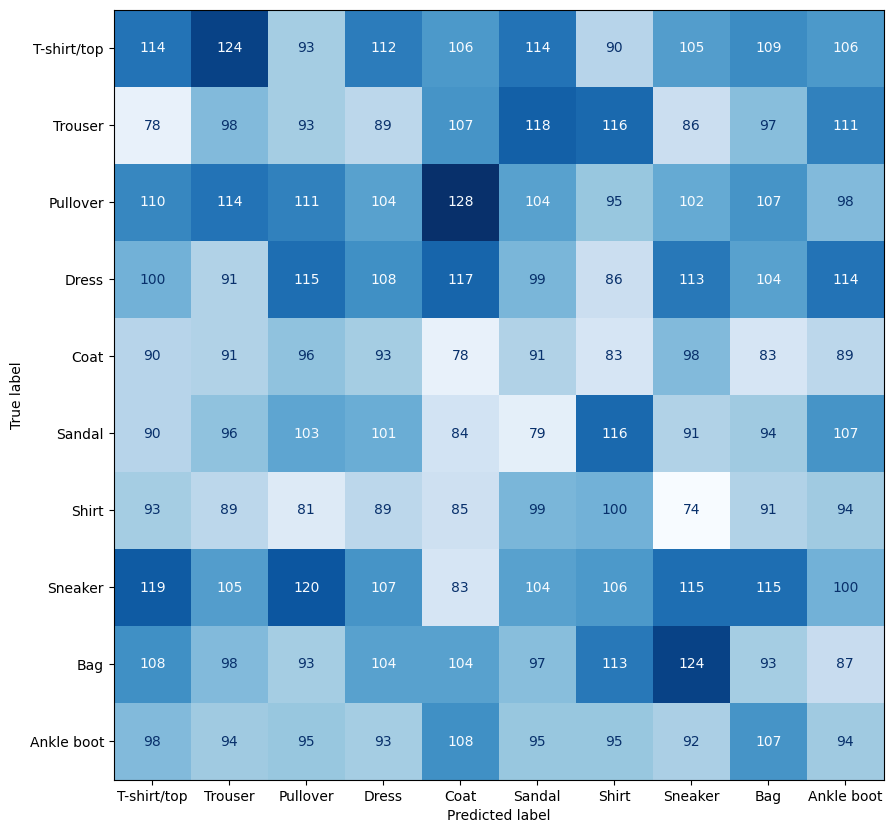

In [105]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confmat_tensor,
                                            display_labels=class_names)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(include_values=True, cmap="Blues",
                colorbar=False, values_format='.0f',ax=ax)

plt.show();